In [49]:
import pandas as pd

In [50]:
file_path = r'G:\Data driven decision making\Notre projet\Data\Pre-processed\Local Products Exportation Morocco.csv'
data = pd.read_csv(file_path, delimiter=',')

In [51]:
data

Period  Agricultural products  Cotton   Leather  \
0   2000-Q1               332441.0   169.0   58295.0   
1   2000-Q2               224801.0   244.0   55548.0   
2   2000-Q3               127046.0    23.0   63902.0   
3   2000-Q4               232257.0     0.0   58893.0   
4   2001-Q1               301359.0    72.0   65345.0   
..      ...                    ...     ...       ...   
89  2022-Q2              1935508.0    32.0   99684.0   
90  2022-Q3              1011122.0    25.0  108998.0   
91  2022-Q4              1644487.0    85.0  112392.0   
92  2023-Q1              2037322.0   467.0  112812.0   
93  2023-Q2              1765575.0    17.0   99937.0   

    Processed food and agro-based products      Total  
0                                 304941.0   695846.0  
1                                 200588.0   481181.0  
2                                 216606.0   407577.0  
3                                 277342.0   568492.0  
4                                 240431.0   607207.0  
..                                     ...        ...  
89                               1011092.0  3046316.0  
90                                851474.0  1971619.0  
91                                829201.0  2586165.0  
92                               1050748.0  3201349.0  
93                                901614.0  2767143.0  

[94 rows x 6 columns]

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Period                                  94 non-null     object 
 1   Agricultural products                   94 non-null     float64
 2   Cotton                                  94 non-null     float64
 3   Leather                                 94 non-null     float64
 4   Processed food and agro-based products  94 non-null     float64
 5   Total                                   94 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.5+ KB


In [53]:
data.describe()

Agricultural products      Cotton        Leather  \
count           9.400000e+01   94.000000      94.000000   
mean            8.142271e+05   29.021277   90058.404255   
std             4.841192e+05   66.137683   18846.344067   
min             1.270460e+05    0.000000   35914.000000   
25%             4.424408e+05    0.000000   79998.250000   
50%             7.004440e+05    1.000000   92831.000000   
75%             1.069214e+06   25.000000  102630.750000   
max             2.120093e+06  467.000000  125270.000000   

       Processed food and agro-based products         Total  
count                            9.400000e+01  9.400000e+01  
mean                             5.312649e+05  1.435579e+06  
std                              2.255900e+05  7.011550e+05  
min                              1.527650e+05  4.075770e+05  
25%                              3.402470e+05  8.733668e+05  
50%                              5.087905e+05  1.371174e+06  
75%                              7.020168e+05  1.845925e+06  
max                              1.060766e+06  3.288152e+06

In [54]:
def last_day_month(month):
    if month == 6 or month == 9:
        return 30
    else:
        return 31

def convert_quarter_to_date(quarter):
    year, q = quarter.split('-Q')
    month = (int(q) - 1) * 3 + 3
    day = last_day_month(month)
    return pd.Timestamp(f"{year}-{month:02d}-{day:02d}")

data['Period'] = data['Period'].apply(convert_quarter_to_date)

data.head()

Period  Agricultural products  Cotton  Leather  \
0 2000-03-31               332441.0   169.0  58295.0   
1 2000-06-30               224801.0   244.0  55548.0   
2 2000-09-30               127046.0    23.0  63902.0   
3 2000-12-31               232257.0     0.0  58893.0   
4 2001-03-31               301359.0    72.0  65345.0   

   Processed food and agro-based products     Total  
0                                304941.0  695846.0  
1                                200588.0  481181.0  
2                                216606.0  407577.0  
3                                277342.0  568492.0  
4                                240431.0  607207.0

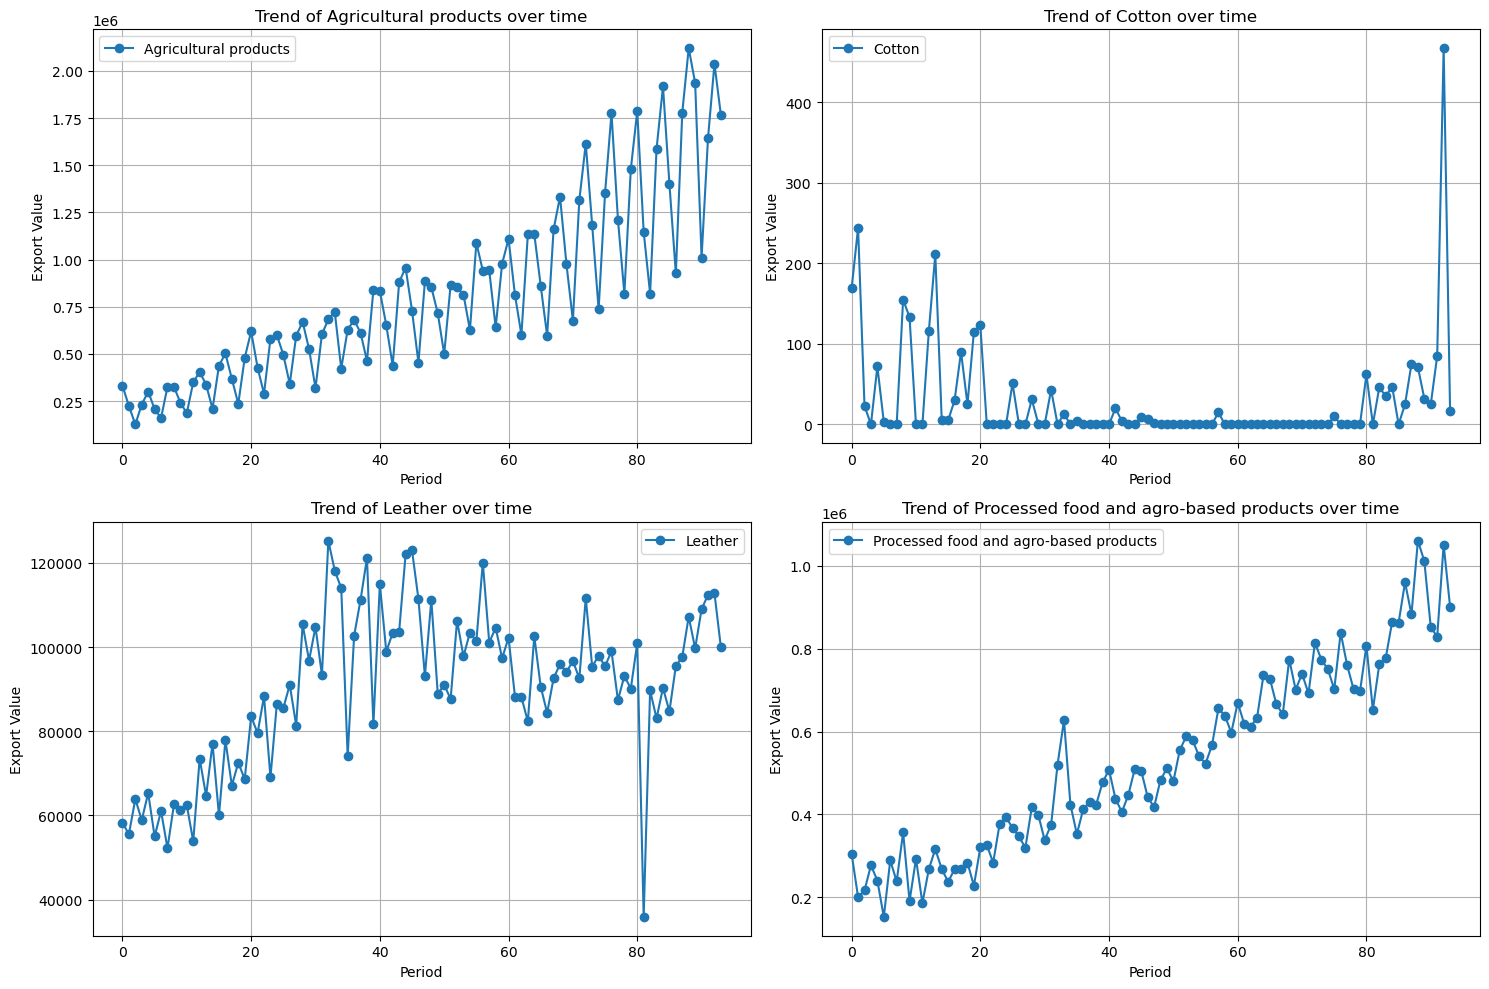

In [56]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

categories = data.columns[1:-1]  # Excluding the 'index' and 'Total' columns

for ax, category in zip(axes.flat, categories):
    ax.plot(data.index, data[category], marker='o', linestyle='-', label=category)
    ax.set_title(f'Trend of {category} over time')
    ax.set_xlabel('Period')
    ax.set_ylabel('Export Value')
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

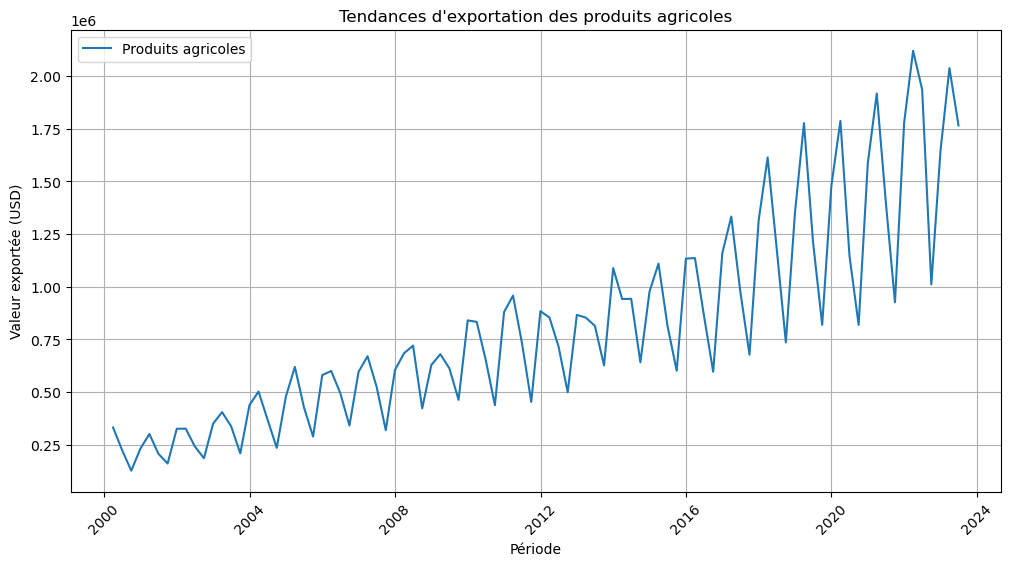

In [62]:
data.columns = data.columns.str.strip()

# Tracer les graphiques
import matplotlib.pyplot as plt

# Produits agricoles
plt.figure(figsize=(12, 6))
plt.plot(data['Period'], data['Agricultural products'], label='Produits agricoles')
plt.title('Tendances d\'exportation des produits agricoles')
plt.xlabel('Période')
plt.ylabel('Valeur exportée (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

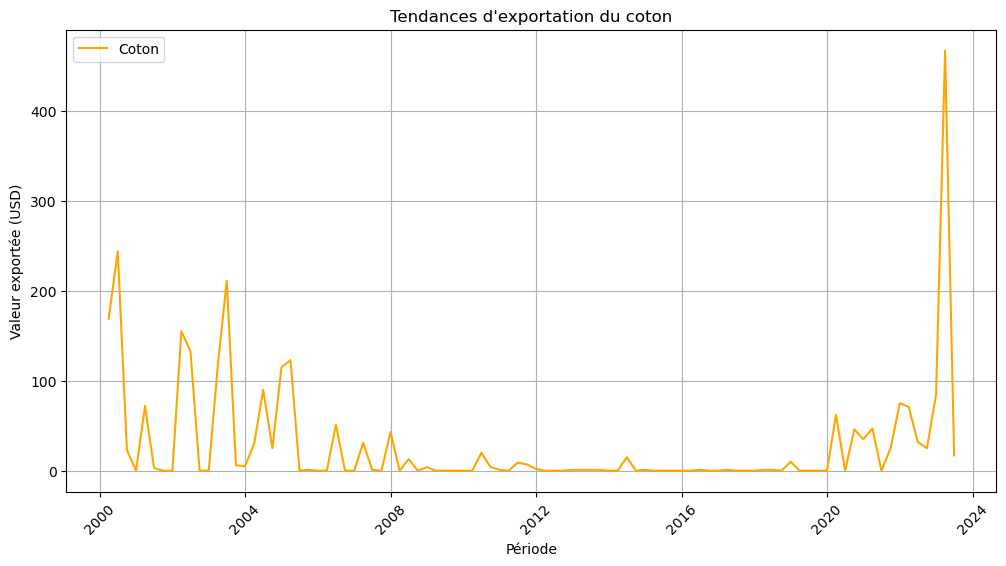

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(data['Period'], data['Cotton'], label='Coton', color='orange')
plt.title('Tendances d\'exportation du coton')
plt.xlabel('Période')
plt.ylabel('Valeur exportée (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

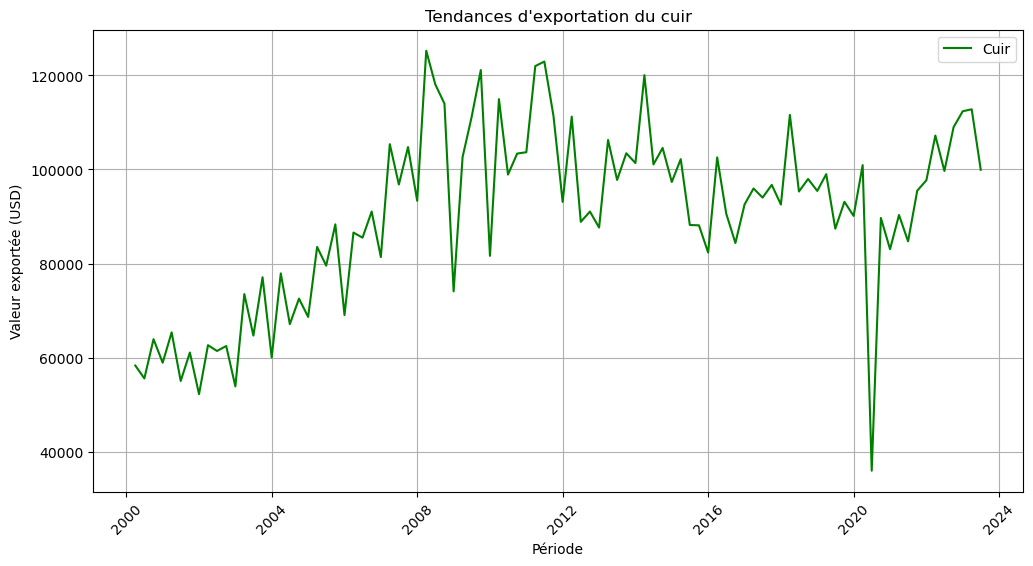

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(data['Period'], data['Leather'], label='Cuir', color='green')
plt.title('Tendances d\'exportation du cuir')
plt.xlabel('Période')
plt.ylabel('Valeur exportée (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

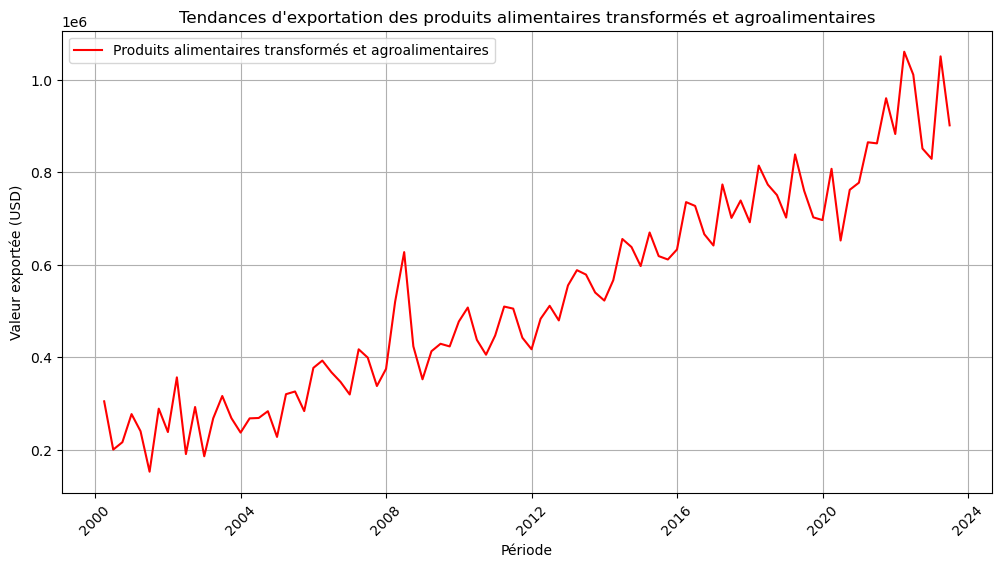

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(data['Period'], data['Processed food and agro-based products'], label='Produits alimentaires transformés et agroalimentaires', color='red')
plt.title('Tendances d\'exportation des produits alimentaires transformés et agroalimentaires')
plt.xlabel('Période')
plt.ylabel('Valeur exportée (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

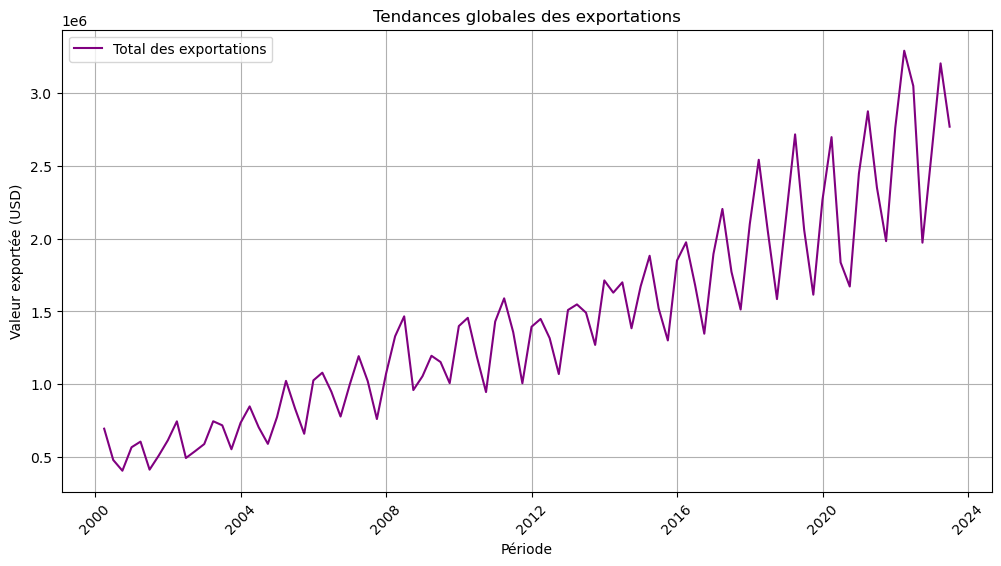

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(data['Period'], data['Total'], label='Total des exportations', color='purple')
plt.title('Tendances globales des exportations')
plt.xlabel('Période')
plt.ylabel('Valeur exportée (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 2000x800 with 0 Axes>

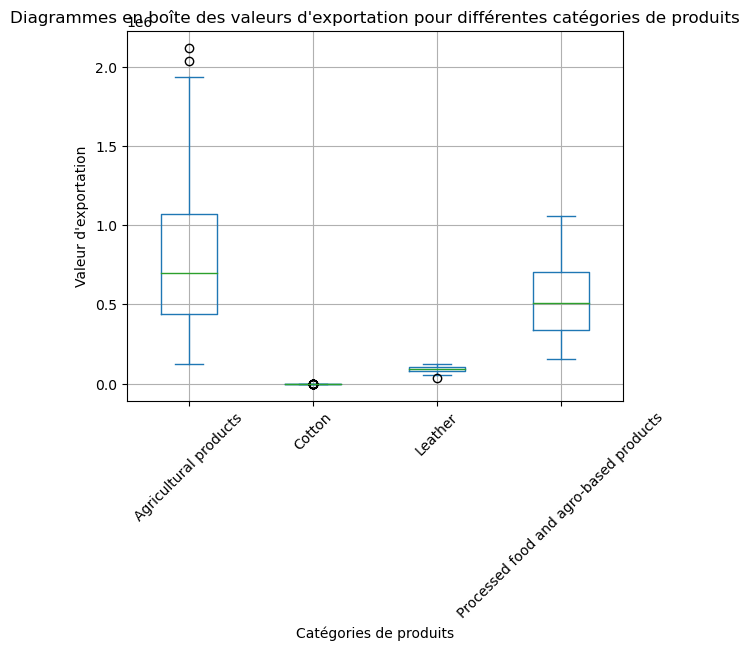

In [73]:
columns_to_plot = ['Agricultural products', 'Cotton', 'Leather', 'Processed food and agro-based products']

# Create box plots
plt.figure(figsize=(20, 8))
data[columns_to_plot].plot(kind='box')
plt.title("Diagrammes en boîte des valeurs d'exportation pour différentes catégories de produits")
plt.ylabel("Valeur d'exportation")
plt.xlabel('Catégories de produits')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

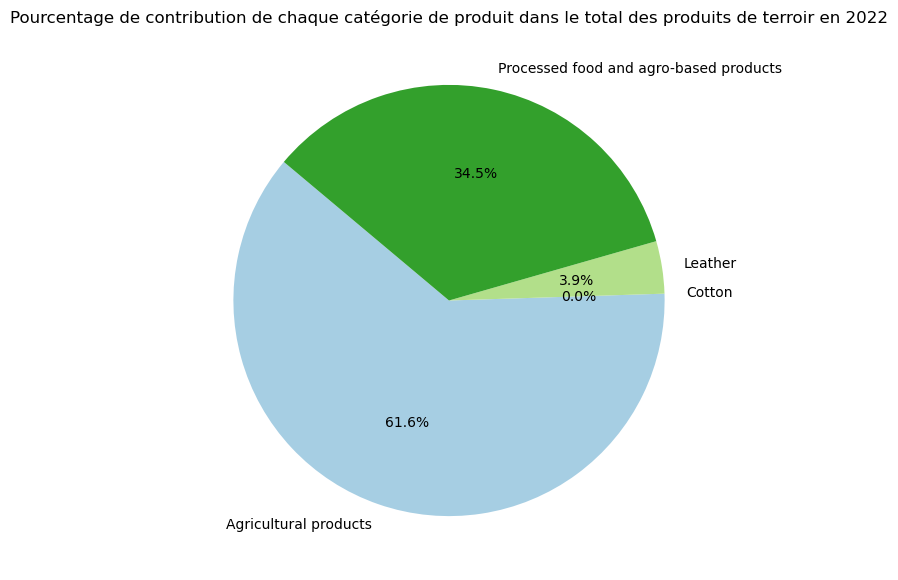

In [75]:
data['Period'] = data['Period'].astype(str)

# Extract the year part from 'Period' column correctly
data['Year'] = data['Period'].str[:4].astype(int)
data_2022 = data[data['Year'] == 2022]

# Calculate the total exports for each category in 2022
total_exports_2022 = data_2022[['Agricultural products', 'Cotton', 'Leather', 'Processed food and agro-based products']].sum()

# Create a pie chart
plt.figure(figsize=(10, 7))
total_exports_2022.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Pourcentage de contribution de chaque catégorie de produit dans le total des produits de terroir en 2022')
plt.ylabel('')
plt.show()

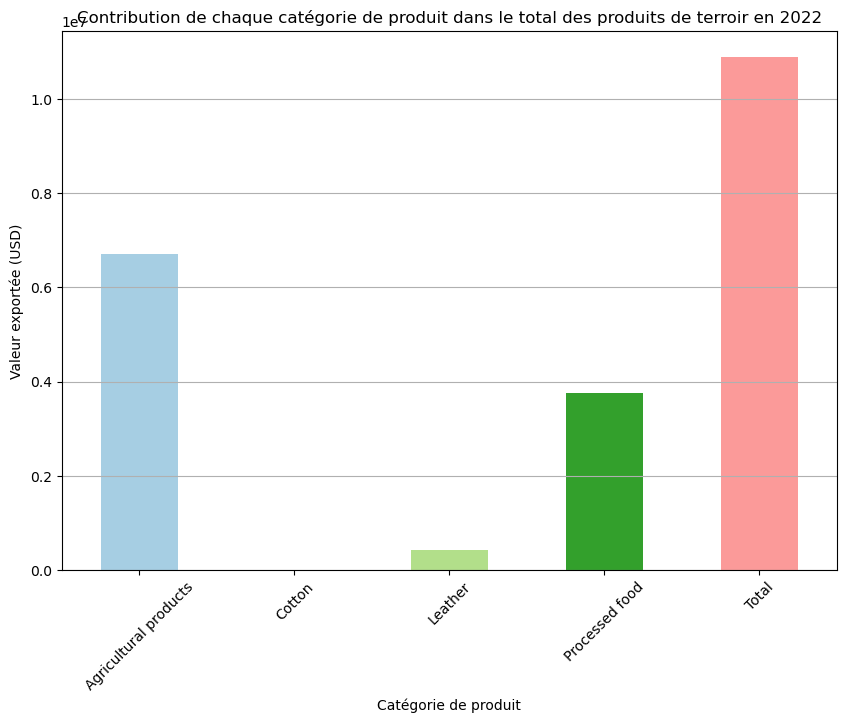

In [77]:
# Rename the category for clarity
total_exports_2022 = total_exports_2022.rename(index={'Processed food and agro-based products': 'Processed food'})

# Add the total export for the year 2022
total_exports_2022['Total'] = total_exports_2022.sum()

# Create a bar plot to show the contribution of each category including the total in 2022
plt.figure(figsize=(10, 7))
total_exports_2022.plot(kind='bar', color=plt.cm.Paired.colors)
plt.title('Contribution de chaque catégorie de produit dans le total des produits de terroir en 2022')
plt.ylabel('Valeur exportée (USD)')
plt.xlabel('Catégorie de produit')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()